In [1]:
from montecarlo import *

# Scenario 1

#### Question 1

In [2]:
#Question 1
fair_coin = Die(['H','T'])
unfair_coin = Die(['H','T'])

unfair_coin.change('H', 5)
unfair_coin.show()

,Faces,Weights
0,H,5.0
1,T,1.0


#### Question 2

In [3]:
fairs = [fair_coin, fair_coin, fair_coin]

In [4]:
game1 = Game(fairs)

In [5]:
game1.play(1000)

In [6]:
game1.show()

Die Number,1,2,3
Roll Number,,,
1,T,T,H
2,H,H,H
3,H,H,H
4,H,T,H
5,H,H,H
...,...,...,...
996,H,T,H
997,T,H,T
998,H,T,H


#### Question 3

In [7]:
mixed = [fair_coin, unfair_coin, unfair_coin]

In [8]:
game2 = Game(mixed)

In [9]:
game2.play(1000)

In [10]:
game2.show()

Die Number,1,2,3
Roll Number,,,
1,H,H,H
2,T,H,H
3,T,H,H
4,H,H,H
5,H,H,H
...,...,...,...
996,H,T,H
997,T,H,H
998,H,H,H


#### Question 4

In [11]:
analyzer1 = Analyzer(game1)
analyzer2 = Analyzer(game2)

In [12]:
freq1 = analyzer1.jackpot()
print("Number of Jackpots for Analyzer1 ", freq1)

Number of Jackpots for Analyzer1  260


In [13]:
freq2 = analyzer2.jackpot()
print("Number of Jackpots for Analyzer2 ", freq2)

Number of Jackpots for Analyzer2  365


#### Question 5

In [17]:
rfreq_a1 = freq1/1000
rfreq_a2 = freq2/1000
print("Number of Jackpots for Analyzer1 ", rfreq_a1)
print("Number of Jackpots for Analyzer2 ", rfreq_a2)

Number of Jackpots for Analyzer1  0.26
Number of Jackpots for Analyzer2  0.365


In [18]:
freq_df = pd.DataFrame({"Coin Types": ['Fair_coins', 'Mixed_coins'], "Relative Freq": [rfreq_a1,rfreq_a2]})

In [19]:
freq_df

,Coin Types,Relative Freq
0,Fair_coins,0.260
1,Mixed_coins,0.365


Text(0.5, 1.0, 'Jackpot Relative Frequenices')

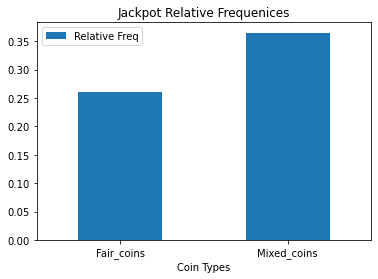

In [20]:
ax = freq_df.plot.bar(x='Coin Types', y='Relative Freq', rot=0)
ax.set_title("Jackpot Relative Frequenices")

# Scenario 2

#### Question 1

In [21]:
l = [1, 2, 3, 4, 5, 6]

In [22]:
die_type1 = Die(l)
die_type1.change(6, 5)
die_type1.show()

,Faces,Weights
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,5.0


In [23]:
die_type2 = Die(l)
die_type2.change(1, 5)
die_type2.show()

,Faces,Weights
0,1,5.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0


In [24]:
die_type3 = Die(l)

#### Question 2

In [25]:
game_die_fair = Game([die_type3, die_type3, die_type3, die_type3, die_type3])
game_die_fair.play(10000)
game_die_fair.show()

Die Number,1,2,3,4,5
Roll Number,,,,,
1,5,4,6,6,3
2,6,3,5,4,6
3,4,2,1,5,2
4,3,3,5,4,6
5,2,5,2,4,6
...,...,...,...,...,...
9996,4,2,3,1,3
9997,5,6,3,3,5
9998,4,4,4,1,2


#### Question 3

In [26]:
game_die_unfair = Game([die_type1, die_type1, die_type2, die_type3, die_type3])
game_die_unfair.play(10000)
game_die_unfair.show()

Die Number,1,2,3,4,5
Roll Number,,,,,
1,6,3,3,2,6
2,1,4,6,3,2
3,6,6,2,4,2
4,6,6,1,1,2
5,6,1,1,3,6
...,...,...,...,...,...
9996,3,1,1,2,1
9997,1,6,1,1,6
9998,1,6,5,3,4


#### Question 4

In [28]:
analyzer1 = Analyzer(game_die_fair)
analyzer2 = Analyzer(game_die_unfair)

In [29]:
rfreq_fair = analyzer1.jackpot()/10000
rfreq_unfair = analyzer2.jackpot()/10000

In [30]:
frequencies = pd.DataFrame({"Die Types": ['Fair_dice', 'Unfair_dice'], "Relative Freq": [rfreq_fair,rfreq_unfair]})
frequencies

,Die Types,Relative Freq
0,Fair_dice,0.0006
1,Unfair_dice,0.0004


Text(0.5, 1.0, 'Jackpot Relative Frequenices')

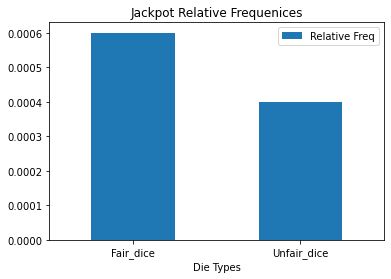

In [31]:
ax = frequencies.plot.bar(x='Die Types', y='Relative Freq', rot=0)
ax.set_title("Jackpot Relative Frequenices")

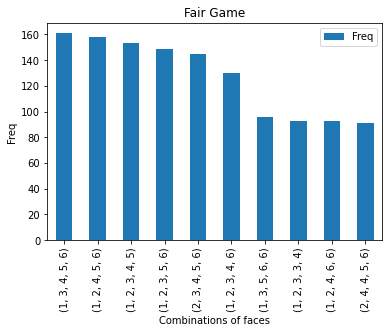

In [32]:
ax1 = analyzer1.combo().sort_values(by='n',ascending=False).head(10).plot.bar(xlabel="Combinations of faces", 
                                                                              ylabel='Freq',title = 'Fair Game')
ax1.legend(['Freq'])

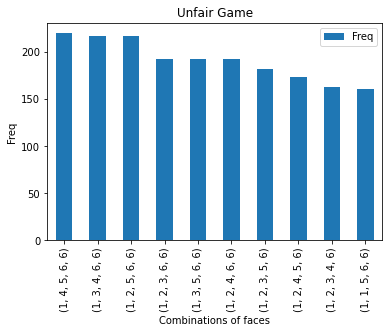

In [33]:
ax2 = analyzer2.combo().sort_values(by='n',ascending=False).head(10).plot.bar(xlabel="Combinations of faces",
                                                                              ylabel='Freq', title = 'Unfair Game')
ax2.legend(['Freq'])

# Scenario 3

#### Question 1 

In [35]:
letters = pd.read_csv('letter-freqs.csv', sep='\t', header = None)
letters.head()

,0,1
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607


In [36]:
import string
die = list(string.ascii_lowercase)  #lower case letters

In [37]:
letter_die = Die(die)

In [38]:
for i in range(len(die)):
    letter_die.change(die[i],letters.loc[i].values[1])

In [39]:
letter_die.show().head()

,Faces,Weights
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607


#### Question 2

In [40]:
letters_list = [letter_die, letter_die, letter_die, letter_die, letter_die]

In [43]:
letter_game = Game(letters_list)
letter_game.play(1000)
letter_game.show()

Die Number,1,2,3,4,5
Roll Number,,,,,
1,l,v,a,n,s
2,l,s,p,e,n
3,l,p,t,d,i
4,e,a,p,i,n
5,t,h,o,u,y
...,...,...,...,...,...
996,i,r,m,f,p
997,m,e,t,e,r
998,u,a,o,i,i


#### Results for Questions 4 and 5

I have sampled the game for 10 times without any success of finding any letter permutations of proper English words. 